In [1]:
import pandas as pd
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv('credit card.csv')
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

In [3]:
df.shape

(30000, 25)

In [5]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [6]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [8]:
df = df.rename(columns={'default.payment.next.month':'payment'})
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'payment'],
      dtype='object')

In [9]:
x = df.drop(['ID','payment'],axis=1)
y = df[['payment']]

In [10]:
y.value_counts()

payment
0          23364
1           6636
dtype: int64

# Extra Trees Classifier

In [11]:
from sklearn.ensemble import ExtraTreesClassifier
extr = ExtraTreesClassifier()
extr.fit(x,y)

ExtraTreesClassifier()

In [12]:
extr.feature_importances_  #IG from Decision Trees

array([0.06592482, 0.0112805 , 0.03242887, 0.02175796, 0.06644943,
       0.10046219, 0.04666524, 0.03359082, 0.02982966, 0.02944323,
       0.0299576 , 0.05056525, 0.047107  , 0.04520221, 0.04364768,
       0.04354828, 0.04418859, 0.04360012, 0.04199179, 0.04194489,
       0.04104245, 0.04270344, 0.04666797])

In [13]:
feature_importance  = extr.feature_importances_
feature_importance

array([0.06592482, 0.0112805 , 0.03242887, 0.02175796, 0.06644943,
       0.10046219, 0.04666524, 0.03359082, 0.02982966, 0.02944323,
       0.0299576 , 0.05056525, 0.047107  , 0.04520221, 0.04364768,
       0.04354828, 0.04418859, 0.04360012, 0.04199179, 0.04194489,
       0.04104245, 0.04270344, 0.04666797])

In [14]:
imp = pd.DataFrame(feature_importance,columns=['Gain_Score'])
imp

Gain_Score
0     0.065925
1     0.011281
2     0.032429
3     0.021758
4     0.066449
5     0.100462
6     0.046665
7     0.033591
8     0.029830
9     0.029443
10    0.029958
11    0.050565
12    0.047107
13    0.045202
14    0.043648
15    0.043548
16    0.044189
17    0.043600
18    0.041992
19    0.041945
20    0.041042
21    0.042703
22    0.046668

In [15]:
x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [16]:
cols = pd.DataFrame(x.columns,columns=['Feature_Names'])
cols

Feature_Names
0      LIMIT_BAL
1            SEX
2      EDUCATION
3       MARRIAGE
4            AGE
5          PAY_0
6          PAY_2
7          PAY_3
8          PAY_4
9          PAY_5
10         PAY_6
11     BILL_AMT1
12     BILL_AMT2
13     BILL_AMT3
14     BILL_AMT4
15     BILL_AMT5
16     BILL_AMT6
17      PAY_AMT1
18      PAY_AMT2
19      PAY_AMT3
20      PAY_AMT4
21      PAY_AMT5
22      PAY_AMT6

In [17]:
gains = pd.concat([cols,imp],axis=1)
gains

Feature_Names  Gain_Score
0      LIMIT_BAL    0.065925
1            SEX    0.011281
2      EDUCATION    0.032429
3       MARRIAGE    0.021758
4            AGE    0.066449
5          PAY_0    0.100462
6          PAY_2    0.046665
7          PAY_3    0.033591
8          PAY_4    0.029830
9          PAY_5    0.029443
10         PAY_6    0.029958
11     BILL_AMT1    0.050565
12     BILL_AMT2    0.047107
13     BILL_AMT3    0.045202
14     BILL_AMT4    0.043648
15     BILL_AMT5    0.043548
16     BILL_AMT6    0.044189
17      PAY_AMT1    0.043600
18      PAY_AMT2    0.041992
19      PAY_AMT3    0.041945
20      PAY_AMT4    0.041042
21      PAY_AMT5    0.042703
22      PAY_AMT6    0.046668

In [18]:
gains.nlargest(15,'Gain_Score')

Feature_Names  Gain_Score
5          PAY_0    0.100462
4            AGE    0.066449
0      LIMIT_BAL    0.065925
11     BILL_AMT1    0.050565
12     BILL_AMT2    0.047107
22      PAY_AMT6    0.046668
6          PAY_2    0.046665
13     BILL_AMT3    0.045202
16     BILL_AMT6    0.044189
14     BILL_AMT4    0.043648
17      PAY_AMT1    0.043600
15     BILL_AMT5    0.043548
21      PAY_AMT5    0.042703
18      PAY_AMT2    0.041992
19      PAY_AMT3    0.041945

In [19]:
gains.nsmallest(10,'Gain_Score')

Feature_Names  Gain_Score
1            SEX    0.011281
3       MARRIAGE    0.021758
9          PAY_5    0.029443
8          PAY_4    0.029830
10         PAY_6    0.029958
2      EDUCATION    0.032429
7          PAY_3    0.033591
20      PAY_AMT4    0.041042
19      PAY_AMT3    0.041945
18      PAY_AMT2    0.041992

<AxesSubplot:>

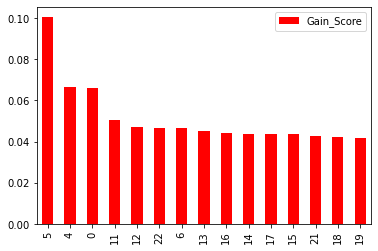

In [20]:
newx = gains.nlargest(15,'Gain_Score')
newx.plot(kind='bar',color=['red'])

In [22]:
import matplotlib.pyplot as plt

<AxesSubplot:>

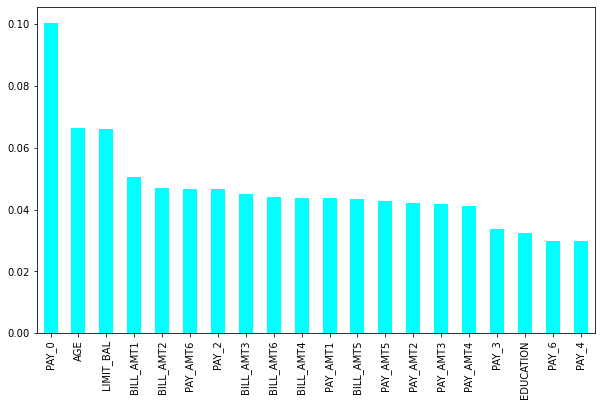

In [23]:
features = pd.Series(extr.feature_importances_,index=x.columns)
plt.figure(figsize=(10,6))
features.nlargest(20).plot(kind='bar',color='cyan')
#plt.savefig('score1.png')

<AxesSubplot:>

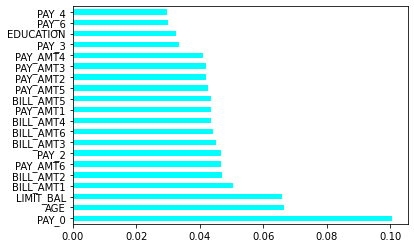

In [24]:
#plt.figure(figsize=(10,6))
features.nlargest(20).plot(kind='barh',color='cyan')

In [25]:
x.corr()

LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0  \
LIMIT_BAL   1.000000  0.024755  -0.219161 -0.108139  0.144713 -0.271214   
SEX         0.024755  1.000000   0.014232 -0.031389 -0.090874 -0.057643   
EDUCATION  -0.219161  0.014232   1.000000 -0.143464  0.175061  0.105364   
MARRIAGE   -0.108139 -0.031389  -0.143464  1.000000 -0.414170  0.019917   
AGE         0.144713 -0.090874   0.175061 -0.414170  1.000000 -0.039447   
PAY_0      -0.271214 -0.057643   0.105364  0.019917 -0.039447  1.000000   
PAY_2      -0.296382 -0.070771   0.121566  0.024199 -0.050148  0.672164   
PAY_3      -0.286123 -0.066096   0.114025  0.032688 -0.053048  0.574245   
PAY_4      -0.267460 -0.060173   0.108793  0.033122 -0.049722  0.538841   
PAY_5      -0.249411 -0.055064   0.097520  0.035629 -0.053826  0.509426   
PAY_6      -0.235195 -0.044008   0.082316  0.034345 -0.048773  0.474553   
BILL_AMT1   0.285430 -0.033642   0.023581 -0.023472  0.056239  0.187068   
BILL_AMT2   0.278314 -0.031183   0.018749 -0.021602  0.054283  0.189859   
BILL_AMT3   0.283236 -0.024563   0.013002 -0.024909  0.053710  0.179785   
BILL_AMT4   0.293988 -0.021880  -0.000451 -0.023344  0.051353  0.179125   
BILL_AMT5   0.295562 -0.017005  -0.007567 -0.025393  0.049345  0.180635   
BILL_AMT6   0.290389 -0.016733  -0.009099 -0.021207  0.047613  0.176980   
PAY_AMT1    0.195236 -0.000242  -0.037456 -0.005979  0.026147 -0.079269   
PAY_AMT2    0.178408 -0.001391  -0.030038 -0.008093  0.021785 -0.070101   
PAY_AMT3    0.210167 -0.008597  -0.039943 -0.003541  0.029247 -0.070561   
PAY_AMT4    0.203242 -0.002229  -0.038218 -0.012659  0.021379 -0.064005   
PAY_AMT5    0.217202 -0.001667  -0.040358 -0.001205  0.022850 -0.058190   
PAY_AMT6    0.219595 -0.002766  -0.037200 -0.006641  0.019478 -0.058673   

              PAY_2     PAY_3     PAY_4     PAY_5  ...  BILL_AMT3  BILL_AMT4  \
LIMIT_BAL -0.296382 -0.286123 -0.267460 -0.249411  ...   0.283236   0.293988   
SEX       -0.070771 -0.066096 -0.060173 -0.055064  ...  -0.024563  -0.021880   
EDUCATION  0.121566  0.114025  0.108793  0.097520  ...   0.013002  -0.000451   
MARRIAGE   0.024199  0.032688  0.033122  0.035629  ...  -0.024909  -0.023344   
AGE       -0.050148 -0.053048 -0.049722 -0.053826  ...   0.053710   0.051353   
PAY_0      0.672164  0.574245  0.538841  0.509426  ...   0.179785   0.179125   
PAY_2      1.000000  0.766552  0.662067  0.622780  ...   0.224146   0.222237   
PAY_3      0.766552  1.000000  0.777359  0.686775  ...   0.227494   0.227202   
PAY_4      0.662067  0.777359  1.000000  0.819835  ...   0.244983   0.245917   
PAY_5      0.622780  0.686775  0.819835  1.000000  ...   0.243335   0.271915   
PAY_6      0.575501  0.632684  0.716449  0.816900  ...   0.241181   0.266356   
BILL_AMT1  0.234887  0.208473  0.202812  0.206684  ...   0.892279   0.860272   
BILL_AMT2  0.235257  0.237295  0.225816  0.226913  ...   0.928326   0.892482   
BILL_AMT3  0.224146  0.227494  0.244983  0.243335  ...   1.000000   0.923969   
BILL_AMT4  0.222237  0.227202  0.245917  0.271915  ...   0.923969   1.000000   
BILL_AMT5  0.221348  0.225145  0.242902  0.269783  ...   0.883910   0.940134   
BILL_AMT6  0.219403  0.222327  0.239154  0.262509  ...   0.853320   0.900941   
PAY_AMT1  -0.080701  0.001295 -0.009362 -0.006089  ...   0.244335   0.233012   
PAY_AMT2  -0.058990 -0.066793 -0.001944 -0.003191  ...   0.316936   0.207564   
PAY_AMT3  -0.055901 -0.053311 -0.069235  0.009062  ...   0.130011   0.300023   
PAY_AMT4  -0.046858 -0.046067 -0.043461 -0.058299  ...   0.143405   0.130191   
PAY_AMT5  -0.037093 -0.035863 -0.033590 -0.033337  ...   0.179712   0.160433   
PAY_AMT6  -0.036500 -0.035861 -0.026565 -0.023027  ...   0.182326   0.177637   

           BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
LIMIT_BAL   0.295562   0.290389  0.195236  0.178408  0.210167  0.203242   
SEX        -0.017005  -0.016733 -0.000242 -0.001391 -0.008597 -0.002229   
EDUCATION  -0.007567  -0.009099 -0.037456 -0.030038 -0.039943 -0

<AxesSubplot:>

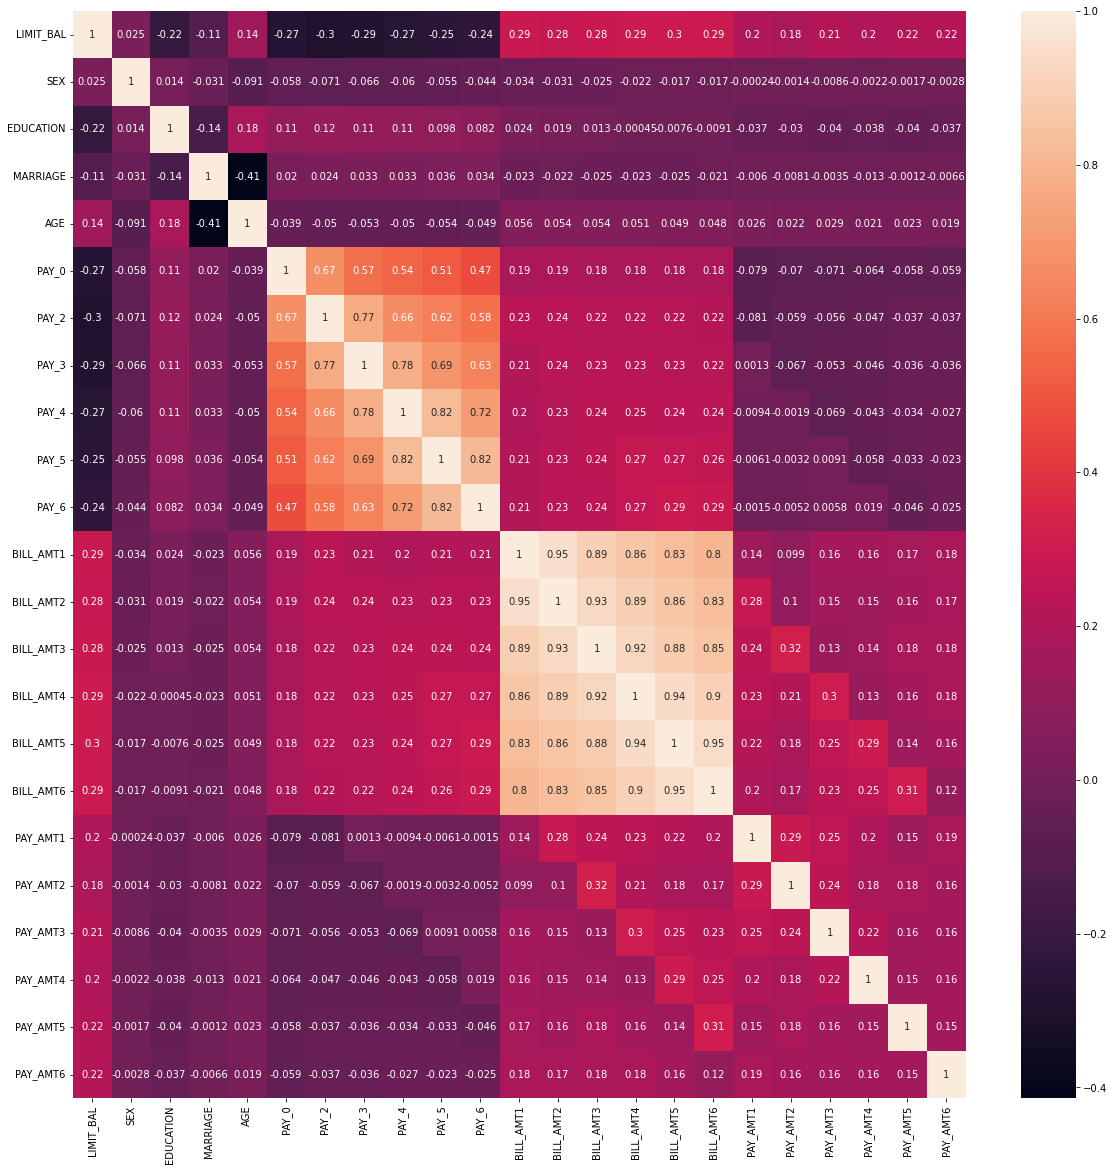

In [27]:
feature_names = x.columns #feature name
colname = x.corr().index #feature name
plt.figure(figsize=(20,20))
sns.heatmap(df[colname].corr(),annot=True)

# Select K Best

In [33]:
df1=pd.read_csv('credit card.csv')
df1 = df1.rename(columns={'default.payment.next.month':'payment'})
x1 = df1.drop(['ID','payment'],axis=1)
y1 = df1[['payment']]

In [34]:
from sklearn.feature_selection import SelectKBest,f_classif,f_regression,chi2 #chi2 only when feature are non negative
model2 = SelectKBest(score_func=f_classif)
feature_score = model2.fit(x,y)
feature_score.scores_

array([7.24068539e+02, 4.79788543e+01, 2.35471118e+01, 1.77812714e+01,
       5.78855582e+00, 3.53771497e+03, 2.23916914e+03, 1.75746644e+03,
       1.47684597e+03, 1.30459118e+03, 1.08540249e+03, 1.15805315e+01,
       6.04423789e+00, 5.94438771e+00, 3.09474518e+00, 1.37108740e+00,
       8.65820292e-01, 1.60403810e+02, 1.03291524e+02, 9.52180109e+01,
       9.71880005e+01, 9.14298008e+01, 8.50890453e+01])

In [35]:
cols2 = pd.DataFrame(feature_score.scores_, columns=['Feature_Scores'])
cols2

Feature_Scores
0       724.068539
1        47.978854
2        23.547112
3        17.781271
4         5.788556
5      3537.714970
6      2239.169136
7      1757.466444
8      1476.845967
9      1304.591176
10     1085.402485
11       11.580532
12        6.044238
13        5.944388
14        3.094745
15        1.371087
16        0.865820
17      160.403810
18      103.291524
19       95.218011
20       97.188000
21       91.429801
22       85.089045

In [37]:
cols3 = pd.DataFrame(x.columns,columns=['Feature_Names'])
scores = pd.concat([cols2,cols3],axis=1)
scores

Feature_Scores Feature_Names
0       724.068539     LIMIT_BAL
1        47.978854           SEX
2        23.547112     EDUCATION
3        17.781271      MARRIAGE
4         5.788556           AGE
5      3537.714970         PAY_0
6      2239.169136         PAY_2
7      1757.466444         PAY_3
8      1476.845967         PAY_4
9      1304.591176         PAY_5
10     1085.402485         PAY_6
11       11.580532     BILL_AMT1
12        6.044238     BILL_AMT2
13        5.944388     BILL_AMT3
14        3.094745     BILL_AMT4
15        1.371087     BILL_AMT5
16        0.865820     BILL_AMT6
17      160.403810      PAY_AMT1
18      103.291524      PAY_AMT2
19       95.218011      PAY_AMT3
20       97.188000      PAY_AMT4
21       91.429801      PAY_AMT5
22       85.089045      PAY_AMT6

In [39]:
scores.nlargest(22,'Feature_Scores')

Feature_Scores Feature_Names
5      3537.714970         PAY_0
6      2239.169136         PAY_2
7      1757.466444         PAY_3
8      1476.845967         PAY_4
9      1304.591176         PAY_5
10     1085.402485         PAY_6
0       724.068539     LIMIT_BAL
17      160.403810      PAY_AMT1
18      103.291524      PAY_AMT2
20       97.188000      PAY_AMT4
19       95.218011      PAY_AMT3
21       91.429801      PAY_AMT5
22       85.089045      PAY_AMT6
1        47.978854           SEX
2        23.547112     EDUCATION
3        17.781271      MARRIAGE
11       11.580532     BILL_AMT1
12        6.044238     BILL_AMT2
13        5.944388     BILL_AMT3
4         5.788556           AGE
14        3.094745     BILL_AMT4
15        1.371087     BILL_AMT5

# PCA

In [46]:
df2=pd.read_csv('credit card.csv')
df2 = df2.rename(columns={'default.payment.next.month':'payment'})
x2 = df2.drop(['ID','payment'],axis=1)
y2 = df2[['payment']]

In [47]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
mmx=MinMaxScaler()
scaled_x=mmx.fit_transform(x2)
scaled_x.shape
scaled_x

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
x_pca=pca.fit_transform(scaled_x)
x_pca

array([[-0.40423245, -0.00800476, -0.00259671],
       [-0.39188881,  0.209224  , -0.1969876 ],
       [-0.39264215,  0.08409527, -0.12656657],
       ...,
       [ 0.62351265,  0.33728838, -0.08489177],
       [ 0.60374479, -0.01953154,  0.21421109],
       [ 0.60917214,  0.00997409,  0.23321987]])

In [48]:
features1 = pd.DataFrame(x_pca,columns=['pca1','pca2','pca3'])
features1

pca1      pca2      pca3
0     -0.404232 -0.008005 -0.002597
1     -0.391889  0.209224 -0.196988
2     -0.392642  0.084095 -0.126567
3     -0.394038  0.068885  0.154030
4      0.610813 -0.089679  0.334445
...         ...       ...       ...
29995  0.605245  0.027127  0.231678
29996  0.601275 -0.132858 -0.028314
29997  0.623513  0.337288 -0.084892
29998  0.603745 -0.019532  0.214211
29999  0.609172  0.009974  0.233220

[30000 rows x 3 columns]

In [49]:
import plotly.express as pl
pl.scatter_3d(features1,x='pca1',y='pca2',z='pca3',color='pca1')

In [50]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest = tts(features1,y2,test_size=.30,random_state=1)

In [51]:
xtrain

pca1      pca2      pca3
4936   0.588201 -0.220413 -0.321038
4788   0.616076  0.062374  0.319937
8447  -0.396698  0.103833 -0.210450
4535   0.588418 -0.368499 -0.139352
27563  0.619138  0.027233  0.115131
...         ...       ...       ...
17289 -0.387321  0.169520  0.248251
5192  -0.413089 -0.415968  0.140726
12172  0.599752  0.071849 -0.267975
235    0.595272 -0.211586 -0.193925
29733  0.589738 -0.262518  0.136323

[21000 rows x 3 columns]

In [52]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(xtrain,ytrain)
clf.score(xtest,ytest)

0.7962222222222223

In [54]:
clf.score(xtrain,ytrain)

0.7938571428571428

In [53]:
y2.value_counts()

payment
0          23364
1           6636
dtype: int64

# Without/Before PCA

In [55]:
xtrain1,xtest1,ytrain1,ytest1=tts(x2,y2,test_size=.30,random_state=1)
xtrain1.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
4936     20000.0    1          1         2   24     -1     -1     -1     -1   
4788    120000.0    1          2         1   52      2      0      0      0   
8447     70000.0    2          2         2   26      0      0      0      0   
4535    230000.0    1          2         2   37      1     -2     -2     -2   
27563   130000.0    1          2         2   56      0      0      0      0   

       PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
4936      -1  ...      390.0      780.0        0.0        0.0     390.0   
4788       0  ...   105262.0    46605.0    45590.0    46204.0    4449.0   
8447       0  ...    26103.0    28342.0    24894.0    25272.0    3003.0   
4535      -2  ...        0.0        0.0        0.0        0.0       0.0   
27563      0  ...   111780.0   116357.0    96936.0    98173.0    4000.0   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
4936      390.0     780.0       0.0       0.0       0.0  
4788     2731.0    3000.0    5000.0    3000.0    3000.0  
8447     5106.0    4026.0     755.0    1029.0    5303.0  
4535        0.0       0.0       0.0       0.0       0.0  
27563    5000.0    8000.0    4000.0    4000.0    5000.0  

[5 rows x 23 columns]

In [59]:
clf.fit(xtrain1,ytrain1)
clf.score(xtest1,ytest1)

0.7777777777777778

In [60]:
clf.score(xtrain1,ytrain1)

0.7791904761904762